# Draw Confusion Matrix
draw confusion martrix from saved .pt file.  
Notice: you should change the gait_cycle, sampling, and pref_path keyword first, then run all cells.

In [2]:
import torch 

# * with out attention loss

# add 
# gait_cycle = '3dcnn_attn_map_True_add'
# pref_path = "/workspace/code/logs/bak/3dcnn_attn_map_True_add/2025-05-10/06-55-28/best_preds"

# mul 
# gait_cycle = '3dcnn_attn_map_True_mul'
# pref_path = "/workspace/code/logs/bak/3dcnn_attn_map_True_mul/2025-05-10/06-55-28/best_preds"

# concat 
# gait_cycle = '3dcnn_attn_map_True_concat'
# pref_path = "/workspace/code/logs/bak/3dcnn_attn_map_True_concat/2025-05-16/13-07-01/best_preds"

# none 
# gait_cycle = '3dcnn_attn_map_True_none'
# pref_path = "/workspace/code/logs/bak/3dcnn_attn_map_True_none/2025-05-16/13-07-01/best_preds"

# * with attention loss

# add 
# gait_cycle = '3dcnnatn_attn_map_True_add'
# pref_path = "/workspace/code/logs/bak/3dcnnatn_attn_map_True_add/2025-05-10/06-55-28/best_preds"

# mul
# gait_cycle = '3dcnnatn_attn_map_True_mul'
# pref_path = "/workspace/code/logs/bak/3dcnnatn_attn_map_True_mul/2025-05-10/06-55-28/best_preds"

# concat
# gait_cycle = '3dcnnatn_attn_map_True_concat'
# pref_path = "/workspace/code/logs/bak/3dcnnatn_attn_map_True_concat/2025-05-16/13-07-01/best_preds"

# none
gait_cycle = '3dcnnatn_attn_map_True_none'
pref_path = "/workspace/code/logs/bak/3dcnnatn_attn_map_True_none/2025-05-16/13-07-01/best_preds"

label = torch.load(f"{pref_path}/0_label.pt")
pred = torch.load(f"{pref_path}/0_pred.pt")

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/code/logs/bak/3dcnnatn_attn_map_True_none/2025-05-16/13-07-01/best_preds/0_label.pt'

In [166]:
# class label balance

a = 0
b = 0
c = 0 

for i in label:
    if i == 0:
        a += 1
    elif i == 1:
        b += 1
    elif i == 2:
        c += 1

print(a, b, c)

1522 1100 2790


In [10]:
from torchmetrics.classification import (
    MulticlassAccuracy,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassF1Score,
    MulticlassConfusionMatrix,
    MulticlassAUROC,
)
import matplotlib.pyplot as plt
import seaborn as sns

# define metrics 
num_class = 3
_accuracy = MulticlassAccuracy(num_class).cuda()
_precision = MulticlassPrecision(num_class).cuda()
_recall = MulticlassRecall(num_class).cuda()
_f1_score = MulticlassF1Score(num_class).cuda()
_auroc = MulticlassAUROC(num_class).cuda()
_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true").cuda()


for i in range(5):
    
	label = torch.load(f"{pref_path}/{i}_label.pt").to(torch.int)
	pred = torch.load(f"{pref_path}/{i}_pred.pt")

	print('*' * 100)
	print(f"fold{i}")
	print('accuracy: %s' % _accuracy(pred, label))
	print('precision: %s' % _precision(pred, label))
	print('recall: %s' % _recall(pred, label))
	print('f1: %s' % _f1_score(pred, label))
	print('aurroc: %s' % _auroc(pred, label))
	print('confusion_matrix: %s' % _confusion_matrix(pred, label))
	print('#' * 100)

	# 设置字体和标题样式
	plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

	# 假设的混淆矩阵数据
	confusion_matrix_data = _confusion_matrix(pred, label).cpu().numpy() * 100

	axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

	# 使用matplotlib和seaborn绘制混淆矩阵
	plt.figure(figsize=(8, 6))
	sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
	plt.title(f'{gait_cycle} (%)', fontsize=30)
	plt.ylabel('Actual Label', fontsize=30)
	plt.xlabel('Predicted Label', fontsize=30)
	plt.show()

NameError: name 'pref_path' is not defined

In [168]:
# load all fold 
all_label = []
all_pred = []	

for i in range(5):
	label = torch.load(f"{pref_path}/{i}_label.pt")
	pred = torch.load(f"{pref_path}/{i}_pred.pt")
	label = label.to(torch.int)
	
	all_label.append(label)
	all_pred.append(pred)
	

In [169]:
len(all_label), all_label[0].shape

(5, torch.Size([5412]))

In [170]:
all_label = torch.cat(all_label)
all_pred = torch.cat(all_pred)

In [171]:
all_label.shape, all_pred.shape

(torch.Size([25515]), torch.Size([25515, 3]))

****************************************************************************************************
3dcnnatn_attn_map_True_none
accuracy: tensor(0.7355, device='cuda:0')
precision: tensor(0.7367, device='cuda:0')
recall: tensor(0.7355, device='cuda:0')
f1_score: tensor(0.7275, device='cuda:0')
aurroc: tensor(0.8753, device='cuda:0')
_confusion_matrix: tensor([[0.7169, 0.2410, 0.0420],
        [0.1576, 0.7990, 0.0434],
        [0.1904, 0.1191, 0.6905]], device='cuda:0')
####################################################################################################


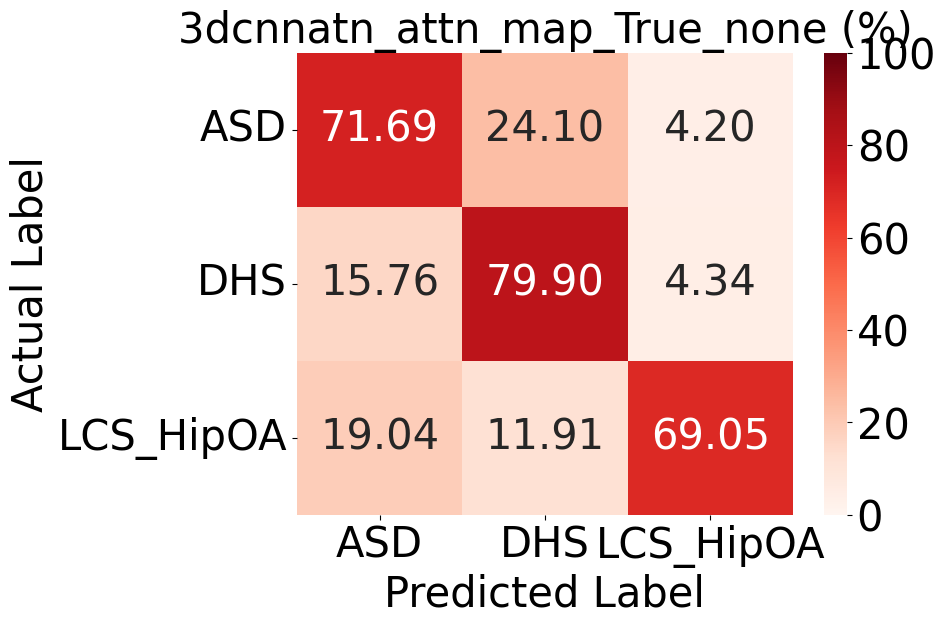

In [172]:
from torchmetrics.classification import (
    MulticlassAccuracy,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassF1Score,
    MulticlassConfusionMatrix,
    MulticlassAUROC,
)

# define metrics 
num_class = 3
_accuracy = MulticlassAccuracy(num_class).cuda()
_precision = MulticlassPrecision(num_class).cuda()
_recall = MulticlassRecall(num_class).cuda()
_f1_score = MulticlassF1Score(num_class).cuda()
_auroc = MulticlassAUROC(num_class).cuda()
_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true").cuda()


print('*' * 100)
print(f'{gait_cycle}')
print('accuracy: %s' % _accuracy(all_pred, all_label))
print('precision: %s' % _precision(all_pred, all_label))
print('recall: %s' % _recall(all_pred, all_label))
print('f1_score: %s' % _f1_score(all_pred, all_label))
print('aurroc: %s' % _auroc(all_pred, all_label))
print('_confusion_matrix: %s' % _confusion_matrix(all_pred, all_label))
print('#' * 100)

# _accuracy = MulticlassAccuracy(num_class, average='micro')
# _precision = MulticlassPrecision(num_class, average='micro')
# _recall = MulticlassRecall(num_class, average='micro')
# _f1_score = MulticlassF1Score(num_class, average='micro')
# _confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true", )


# print('*' * 100)
# print('micro')
# print('accuracy: %s' % _accuracy(all_pred, all_label))
# print('precision: %s' % _precision(all_pred, all_label))
# print('_binary_recall: %s' % _recall(all_pred, all_label))
# print('_binary_f1: %s' % _f1_score(all_pred, all_label))
# print('_confusion_matrix: %s' % _confusion_matrix(all_pred, all_label))
# print('#' * 100)


import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和标题样式
plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

# 假设的混淆矩阵数据
confusion_matrix_data = _confusion_matrix(all_pred, all_label).cpu().numpy() * 100

axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

# draw confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
plt.title(f'{gait_cycle} (%)', fontsize=30)
plt.ylabel('Actual Label', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.show()

# Draw CM by self

In [173]:
import torch 

# this result from mmaction2 ckpt.
cm = torch.tensor(
    [
		[128, 29, 53],
		[20, 49, 3],
		[106, 0, 116],
	]
)


In [174]:
manual_label = []
manual_pred = []

for i in range(cm.shape[0]):
		
	for j in range(cm.shape[1]):
		for k in range(cm[i][j]):
			manual_label.append(i)
			if j == 0:
				manual_pred.append([1.0, 0, 0])
			elif j == 1:
				manual_pred.append([0, 1., 0])
			elif j == 2:
				manual_pred.append([0, 0, 1.])

manual_label = torch.tensor(manual_label)
manual_pred = torch.tensor(manual_pred)

****************************************************************************************************
accuracy: tensor(0.6042)
precision: tensor(0.6022)
_binary_recall: tensor(0.6042)
_binary_f1: tensor(0.5980)
_aurroc: tensor(0.6864)
_confusion_matrix: tensor([[0.6095, 0.1381, 0.2524],
        [0.2778, 0.6806, 0.0417],
        [0.4775, 0.0000, 0.5225]])
####################################################################################################


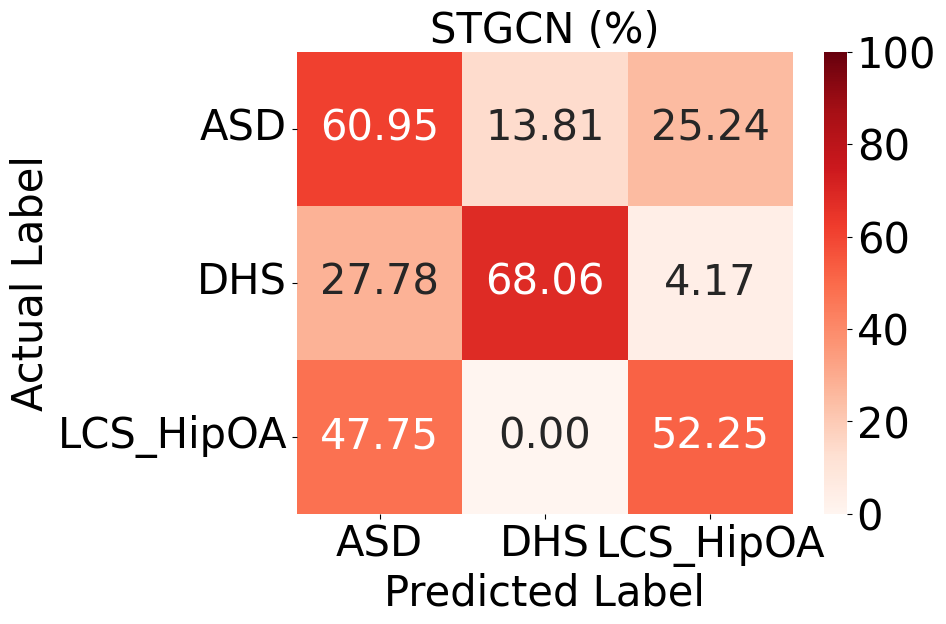

In [175]:
from torchmetrics.classification import (
    MulticlassAccuracy,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassF1Score,
    MulticlassConfusionMatrix,
    MulticlassAUROC,
)

# define metrics 
num_class = 3
_accuracy = MulticlassAccuracy(num_class)
_precision = MulticlassPrecision(num_class)
_recall = MulticlassRecall(num_class)
_f1_score = MulticlassF1Score(num_class)
_auroc = MulticlassAUROC(num_class)
_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")


print('*' * 100)
print('accuracy: %s' % _accuracy(manual_pred, manual_label))
print('precision: %s' % _precision(manual_pred, manual_label))
print('_binary_recall: %s' % _recall(manual_pred, manual_label))
print('_binary_f1: %s' % _f1_score(manual_pred, manual_label))
print('_aurroc: %s' % _auroc(manual_pred, manual_label))
print('_confusion_matrix: %s' % _confusion_matrix(manual_pred, manual_label))
print('#' * 100)

import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和标题样式
plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

# 假设的混淆矩阵数据
confusion_matrix_data = _confusion_matrix(manual_pred, manual_label).cpu().numpy() * 100

axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

# 使用matplotlib和seaborn绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
plt.title(f'STGCN (%)', fontsize=30)
plt.ylabel('Actual Label', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.show()